In [ ]:
# If running in Google Colab, import files
try:
    import google.colab
    in_colab = True
except:
    in_colab = False

if in_colab:
    !git clone https://github.com/ahojszyk/OnePixelAttackFashionMINST.git

Cloning into 'OnePixelAttackFashionMINST'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 61 (delta 24), reused 34 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 31.00 MiB | 13.39 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import json
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import time

# Fashion MNIST class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
import numpy as np
import keras
import seaborn as sns
import pandas as pd
import sklearn
import json
import os
import time
from matplotlib import pyplot as plt

In [ ]:
class Net:

    def __init__(self, epochs=200, batch_size=128, load_weights=True, net_type='LeNet'):

        """
        A class representing various CNN architectures for CIFAR-10.
        Includes training, evaluation, prediction, and visualization capabilities.
        """

        self.name = net_type
        self.model_filename =  f'OnePixelAttackFashionMINST/networks/models/{net_type}.keras'
        self.checkpoint_filepath = f'OnePixelAttackFashionMINST/networks/models/{net_type}_checkpoint.keras'
        self.num_classes = 10
        self.input_shape = (28, 28, 1)  # Adjusted for Fashion MNIST
        self.batch_size = batch_size
        self.epochs = epochs
        self.weight_decay = 0.0001
        self.log_filepath = f'OnePixelAttackFashionMINST/networks/models/{net_type}'

        if load_weights:
            try:
                self._model = load_model(self.model_filename)
                print('Successfully loaded', self.name)
            except (ImportError, ValueError, OSError):
                print('Failed to load', self.name)

    def build_model(self):

        """
        Build the model based on the specified network type.

        Returns:
            keras.Model: Compiled model.
        """

        if self.name == 'LeNet':
            model = Sequential()
            model.add(Conv2D(6, kernel_size=5, strides=1, activation='relu', input_shape=self.input_shape, padding='same'))
            model.add(AveragePooling2D(pool_size=2, strides=2))
            model.add(Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'))
            model.add(AveragePooling2D(pool_size=2, strides=2))
            model.add(Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'))
            model.add(Flatten())
            model.add(Dense(84, activation='relu'))
            model.add(Dense(self.num_classes, activation='softmax'))

        elif self.name == 'All Convolution':
            model = Sequential()
            model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', input_shape=self.input_shape))
            model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same'))
            model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2))
            model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))
            model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))

            model.add(Dropout(0.3))

            model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2))
            model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2))
            model.add(Conv2D(192, (1, 1), activation='relu', padding='valid'))
            model.add(Conv2D(10, (1, 1), activation='relu', padding='valid'))

            model.add(GlobalAveragePooling2D())
            model.add(Activation('softmax'))


        elif self.name == 'VGG8':
            model = Sequential()
            model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                            padding='same', input_shape=(28, 28, 1)))
            model.add(BatchNormalization())
            model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
            model.add(BatchNormalization())
            model.add(MaxPooling2D((2, 2)))
            model.add(Dropout(0.2))

            model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
            model.add(BatchNormalization())
            model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
            model.add(BatchNormalization())
            model.add(MaxPooling2D((2, 2)))
            model.add(Dropout(0.3))

            model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
            model.add(BatchNormalization())
            model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
            model.add(BatchNormalization())
            model.add(MaxPooling2D((2, 2)))
            model.add(Dropout(0.4))

            model.add(Flatten())
            model.add(Dense(8192, activation='relu', kernel_initializer='he_uniform'))
            model.add(BatchNormalization())
            model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
            model.add(Dropout(0.5))
            model.add(Dense(10, activation='softmax'))


        elif self.name == "Network in Network":
            model = Sequential()
            model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal", input_shape=self.input_shape))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Conv2D(160, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Conv2D(96, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))

            model.add(Dropout(0.5))

            model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Conv2D(192, (1, 1),padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Conv2D(192, (1, 1),padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))

            model.add(Dropout(0.5))

            model.add(Conv2D(192, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Conv2D(192, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Conv2D(10, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(self.weight_decay), kernel_initializer="he_normal"))
            model.add(BatchNormalization())
            model.add(Activation('relu'))

            model.add(GlobalAveragePooling2D())
            model.add(Activation('softmax'))

        model.compile(optimizer=Adam(learning_rate=self.weight_decay), loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def train(self, data_aug=True, early_stopping=True, patience=5):

        """
        Train the model on the CIFAR-10 dataset.

        Args:
            data_aug (bool): Whether to use data augmentation.
            early_stopping (bool): Whether to use early stopping.
            patience (int): Number of epochs to wait for early stopping.
        """

        # Load Fashion MNIST dataset
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
        x_train = x_train.reshape(-1, 28, 28, 1)
        x_test = x_test.reshape(-1, 28, 28, 1)
        y_train = tf.keras.utils.to_categorical(y_train, self.num_classes)
        y_test = tf.keras.utils.to_categorical(y_test, self.num_classes)

        # Build network
        model = self.build_model()
        model.summary()

        print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

        # EarlyStopping callback
        callbacks = []
        if early_stopping:
            early_stop = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
            callbacks.append(early_stop)

        # ModelCheckpoint callback
        checkpoint_callback = ModelCheckpoint(
            self.checkpoint_filepath,
            monitor='val_loss',
            save_best_only=True,
            mode='min',
            verbose=1
        )
        callbacks.append(checkpoint_callback)

        # Start timing the training process
        start_time = time.time()


        # Using real-time data augmentation
        if data_aug:
            print('Using real-time data augmentation.')
            datagen = ImageDataGenerator(
                horizontal_flip=True,
                width_shift_range=0.125,
                height_shift_range=0.125,
                fill_mode='nearest'
            )
            datagen.fit(x_train)

            hist = model.fit(datagen.flow(x_train, y_train, batch_size=self.batch_size),
                             epochs=self.epochs,
                             validation_data=(x_test, y_test),
                             callbacks=callbacks)
        else:
            print('No data augmentation.')
            hist = model.fit(x_train, y_train, batch_size=self.batch_size,
                             epochs=self.epochs,
                             validation_data=(x_test, y_test),
                             callbacks=callbacks)
        # End timing
        self.training_time = time.time() - start_time

        # Save the training history
        with open(f'{self.log_filepath}_training_history.json', 'w') as f:
            json.dump(hist.history, f)

        # Save the final model
        model.save(self.model_filename)
        self._model = model

    def predict(self, img):
        """
        Process the image and predict the labels in batch mode.
        """
        img = np.expand_dims(img, axis=-1)
        img = np.reshape(img, (-1, 28, 28, 1))

        return self._model.predict(img, batch_size=self.batch_size, verbose=0)


    def plot_history(self):

        """
        Plot training and validation loss and accuracy from training history.
        """

        with open(f'{self.log_filepath}_training_history.json', 'r') as f:
            history = json.load(f)

        epochs = range(1, len(history['loss']) + 1)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs, history['loss'], 'bo-', label='Training Loss')
        plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, history['accuracy'], 'bo-', label='Training Accuracy')
        plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.suptitle(self.name)
        plt.show()

    def visualize_confusion_matrix(self):

        """
        Generate and visualize the confusion matrix for the model predictions on test data.
        """

        _, (x_test, y_test) = fashion_mnist.load_data()
        x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') # / 255
        y_test = tf.keras.utils.to_categorical(y_test, self.num_classes)

        y_pred = self._model.predict(x_test, batch_size=self.batch_size)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)

        cm = confusion_matrix(y_true, y_pred_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"{self.name} Confusion Matrix")
        plt.show()

    def visualize_predictions(self, num_samples=10):

        """
        Visualize sample predictions alongside their true class labels.

        Parameters:
        - num_samples: Number of samples to visualize (default is 10).
        """

        _, (x_test, y_test) = fashion_mnist.load_data()
        x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')# / 255
        y_true = y_test.flatten()

        indices = np.random.choice(range(len(x_test)), size=num_samples, replace=False)
        fig, axs = plt.subplots(2, 5, figsize=(15, 7))
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        for i, idx in enumerate(indices):
            img = x_test[idx].reshape(28, 28)
            pred_label = np.argmax(self._model.predict(np.expand_dims(img, axis=0)))
            true_class_name = class_names[y_true[idx]]
            pred_class_name = class_names[pred_label]

            ax = axs[i // 5, i % 5]
            ax.imshow(img, cmap='gray')
            ax.set_title(f"True: {true_class_name}\nPred: {pred_class_name}",
                         color=("green" if true_class_name == pred_class_name else "red"))
            ax.axis("off")

        plt.suptitle("Sample Predictions with True and Predicted Class Names")
        plt.show()

    def predict_one(self, img):

        """
        Predict the label for a single image.
        """
        return self.predict(img)[0]

    def count_params(self):

        """
        Return the number of trainable parameters in the model.

        Returns:
            int: Number of trainable parameters.
        """
        return self._model.count_params()

    def accuracy(self):

        """
        Evaluate the model accuracy on the CIFAR-10 test dataset.
        """
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
        x_train = x_train.reshape(-1, 28, 28, 1)
        x_test = x_test.reshape(-1, 28, 28, 1)
        y_train = tf.keras.utils.to_categorical(y_train, self.num_classes)
        y_test = tf.keras.utils.to_categorical(y_test, self.num_classes)
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')


        return self._model.evaluate(x_test, y_test, verbose=0)[1]


In [ ]:
# Load pretrained models
NiN = Net(load_weights = True, net_type = 'Network in Network')
AllConv = Net(load_weights = True, net_type = 'All Convolution')
LeNet = Net(load_weights = True, net_type = 'LeNet')

Successfully loaded Network in Network
Successfully loaded All Convolution
Successfully loaded LeNet


In [ ]:
models = [LeNet, AllConv, NiN]

def assess_models(models_list):
    """
    Evaluates the performance of a list of models on the Fashion MNIST dataset and returns results as DataFrames.

    Parameters:
        models_list (list): A list of model objects. Each model should have:
                            - `name` (str): The model's name.
                            - `predict(data)` method: Returns predictions for the input data.
                            - `count_params()` method: Returns the total number of parameters in the model.
                            - `training_time` attribute: The time taken to train the model.

    Returns:
        tuple:
            - model_performance_df (pd.DataFrame): A DataFrame with columns
                                                  ['model_name', 'accuracy', 'parameter_count', 'training_time']
            - correctly_classified_images_df (pd.DataFrame): A DataFrame with columns
                                                            ['model_name', 'image_index', 'true_label', 'confidence', 'predictions']
    """

    # Initialize lists to store results
    correctly_classified_images = []
    model_performance = []

    # Load Fashion MNIST dataset
    (train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

    # Reshape test data to include a channel dimension
    test_data = test_data.reshape(-1, 28, 28, 1)

    # Iterate through each model in the list
    for model in models_list:
        # Train the model (if needed)
        if not hasattr(model, '_model') or model._model is None:
            model.train()  # Ensure the model is trained

        # Get predictions for the test dataset
        predictions = model.predict(test_data)

        # Identify correctly classified images
        correctly_classified = [
            [model.name, img_idx, true_label, np.max(pred), pred]
            for img_idx, (true_label, pred) in enumerate(zip(test_labels, predictions))
            if true_label == np.argmax(pred)  # Check if prediction matches the true label
        ]

        # Calculate accuracy as the ratio of correctly classified images to total images
        accuracy = len(correctly_classified) / len(test_data)

        # Add correctly classified image details and model performance stats
        correctly_classified_images += correctly_classified
        model_performance.append([model.name, accuracy, model.count_params(), model.training_time])

    # Convert lists to DataFrames
    correctly_classified_images_df = pd.DataFrame(
        correctly_classified_images,
        columns=['model_name', 'image_index', 'true_label', 'confidence', 'predictions']
    )
    model_performance_df = pd.DataFrame(
        model_performance,
        columns=['model_name', 'accuracy', 'parameter_count', 'training_time']
    )

    # Return DataFrames
    return model_performance_df, correctly_classified_images_df


network_stats, correct_imgs = assess_models(models)

In [ ]:
from OnePixelAttackFashionMINST.DifferentialEvolution import differential_evolution

class Attack:
    def __init__(self, x_test, y_test, models, csv_path, correct_imgs, maxiter=75, popsize=400, verbose=False):
    """
    Initializes the Attack class with data, models, and parameters.

    Parameters:
        x_test (numpy.ndarray): The test dataset images to be used in the attack.
        y_test (numpy.ndarray): The test dataset labels corresponding to the images.
        models (list): A list of model objects to be attacked.
        csv_path (str): The path to the results CSV file where attack results will be saved.
        correct_imgs (pd.DataFrame): A DataFrame containing the images that were correctly classified by the models.
        maxiter (int): The maximum number of iterations for the differential evolution algorithm.
        popsize (int): The population size used in the differential evolution algorithm.
        verbose (bool): Flag to enable or disable verbose logging during the attack process.
    """
        self.x_test = x_test
        self.y_test = y_test
        self.models = models
        self.csv_path = csv_path
        self.correct_imgs = correct_imgs
        self.maxiter = maxiter
        self.popsize = popsize
        self.verbose = verbose

        # Ensure the results CSV exists or create an empty DataFrame
        if os.path.exists(csv_path):
            # Load the DataFrame and ensure headers are present
            self.results_df = pd.read_csv(csv_path)
            expected_columns = [
                'model_name', 'pixel_count', 'img_id', 'actual_class',
                'predicted_class', 'success', 'confidence_diff',
                'prior_probs', 'predicted_probs', 'perturbation', 'target_class'
            ]
            if list(self.results_df.columns) != expected_columns:
                raise ValueError(f"The CSV at {csv_path} does not have the expected headers.")
        else:
            # Create a new DataFrame with the required columns
            columns = [
                'model_name', 'pixel_count', 'img_id', 'actual_class',
                'predicted_class', 'success', 'confidence_diff',
                'prior_probs', 'predicted_probs', 'perturbation', 'target_class'
            ]
            self.results_df = pd.DataFrame(columns=columns)

        # Track completed image-model-pixel combinations
        self.completed_combinations = set(zip(
            self.results_df['model_name'],
            self.results_df['pixel_count'],
            self.results_df['img_id']
        ))

    def _get_sampled_images(self, samples):
        """
        Samples 10% of images per class to ensure a balanced dataset.

        Parameters:
            samples (int): Total number of images to sample from the dataset.

        Returns:
            numpy.ndarray: Array of sampled image indices.
        """
        # Get the list of fully correct images (images correctly classified by all models)
        total_models = self.correct_imgs['model_name'].nunique()
        fully_correct_imgs = self.correct_imgs.groupby('image_index').filter(
            lambda x: x['model_name'].nunique() == total_models
        )

        # Exclude already used images
        existing_imgs = self.results_df['img_id'].unique() if not self.results_df.empty else []
        eligible_images = fully_correct_imgs[~fully_correct_imgs['image_index'].isin(existing_imgs)]

        # Ensure there are enough images left to sample from
        if len(eligible_images) < samples:
            raise ValueError(f"Not enough unique images remaining. Needed: {samples}, Available: {len(eligible_images)}")

        # Perform balanced sampling across classes
        sampled_images = eligible_images.groupby('true_label').apply(
            lambda x: x.sample(int(samples / 10), replace=False)
        )
        return sampled_images['image_index'].unique()

    @staticmethod
    def perturb_image(xs, img):
        """
        Perturbs an image using the given pixel perturbations.

        Parameters:
            xs (numpy.ndarray): Array of perturbations to apply to the image.
            img (numpy.ndarray): The original image to perturb.

        Returns:
            numpy.ndarray: Array of perturbed images after applying the perturbations.
        """
        if xs.ndim < 2:
            xs = np.array([xs])

        img = img.reshape(28, 28)
        tile = [len(xs)] + [1] * img.ndim
        imgs = np.tile(img, tile)
        xs = xs.astype(int)

        for x, img in zip(xs, imgs):
            pixels = np.split(x, len(x) // 3)
            for pixel in pixels:
                x_pos, y_pos, grayscale_value = pixel
                x_pos = np.clip(x_pos, 0, 27)
                y_pos = np.clip(y_pos, 0, 27)
                img[x_pos, y_pos] = grayscale_value

        return imgs

    def predict_classes(self, xs, img, target_class, model, minimize=True):
        """
        Predicts the class probabilities of perturbed images.

        Parameters:
            xs (numpy.ndarray): Array of perturbations to apply to the image.
            img (numpy.ndarray): The original image to perturb.
            target_class (int): The target class for the attack.
            model (object): The model used to evaluate the perturbed image.
            minimize (bool): Whether to minimize or maximize the objective (target class).

        Returns:
            numpy.ndarray: Predicted probabilities for the target class after perturbing the image.
        """
        imgs_perturbed = self.perturb_image(xs, img)
        predictions = model.predict(imgs_perturbed)[:, target_class]
        return predictions if minimize else 1 - predictions

    def attack_success(self, x, img, target_class, model, targeted_attack):
        """
        Checks if the attack is successful.

        Parameters:
            x (numpy.ndarray): Perturbation vector applied to the image.
            img (numpy.ndarray): The original image.
            target_class (int): The target class for the attack.
            model (object): The model used to evaluate the perturbed image.
            targeted_attack (bool): Whether this is a targeted attack.

        Returns:
            bool: True if the attack successfully manipulates the model’s prediction, False otherwise.
        """
        attack_image = self.perturb_image(x, img)
        confidence = model.predict(attack_image)[0]
        predicted_class = np.argmax(confidence)

        if ((targeted_attack and predicted_class == target_class) or
            (not targeted_attack and predicted_class != target_class)):
            return True
        return False

    def attack(self, img_id, model, target=None, pixel_count=1):
        """
        Executes a one-pixel attack on a single image.

        Parameters:
            img_id (int): ID of the image to attack.
            model (object): The model used for the attack.
            target (int): Target class for the attack (used in targeted attacks).
            pixel_count (int): Number of pixels to perturb in the image.

        Returns:
            dict: Attack results including metadata and model predictions after the attack.
        """
        targeted_attack = target is not None
        target_class = target if targeted_attack else self.y_test[img_id]
        bounds = [(0, 28), (0, 28), (0, 255)] * pixel_count
        popmul = max(1, self.popsize // len(bounds))

        def predict_fn(xs):
            return self.predict_classes(xs, self.x_test[img_id], target_class, model, target is None)

        def callback_fn(x, convergence):
            return self.attack_success(x, self.x_test[img_id], target_class, model, targeted_attack)

        attack_result = differential_evolution(
            predict_fn, bounds, maxiter=self.maxiter, popsize=popmul,
            recombination=1, atol=-1, callback=callback_fn, polish=False)

        attack_image = self.perturb_image(attack_result.x, self.x_test[img_id])[0]
        prior_probs = model.predict_one(self.x_test[img_id])
        predicted_probs = model.predict_one(attack_image)
        predicted_class = np.argmax(predicted_probs)
        actual_class = self.y_test[img_id]
        success = predicted_class != actual_class
        cdiff = prior_probs[actual_class] - predicted_probs[actual_class]

        if self.verbose:
            plt.imshow(attack_image, cmap='gray')
            print(f"Actual: {actual_class}, Predicted: {predicted_class}")

        # Add target_class to the returned result
        return [
            model.name, pixel_count, img_id, actual_class, predicted_class,
            success, cdiff, prior_probs, predicted_probs, attack_result.x, target_class
        ]

    def attack_all(self, samples=100, pixels=(1, 3, 5), targeted=False):
        """
        Executes one-pixel attacks on multiple images and saves results.

        Parameters:
            samples (int): Number of images to sample for the attack.
            pixels (tuple): Tuple of pixel counts to use for the attacks.
            targeted (bool): Flag indicating whether to perform targeted attacks.

        Returns:
            pd.DataFrame: DataFrame containing the results of the attacks, including predictions and metadata.
        """
        sampled_images = self._get_sampled_images(samples)

        for model in self.models:
            for pixel_count in pixels:
                for img_id in sampled_images:
                    if (model.name, pixel_count, img_id) in self.completed_combinations:
                        continue

                    print(f'\n{model.name} - image {img_id} - pixel count {pixel_count}')
                    targets = [None] if not targeted else range(10)

                    for target in targets:
                        if targeted and target == self.y_test[img_id]:
                            continue

                        result = self.attack(img_id, model, target, pixel_count)
                        result_df = pd.DataFrame([result], columns=self.results_df.columns)
                        result_df.to_csv(self.csv_path, mode='a', header=False, index=False)
                        self.completed_combinations.add((model.name, pixel_count, img_id))

        final_results_df = pd.read_csv(self.csv_path)
        return final_results_df


<ipython-input-28-b2817a7d5f89>:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_images = eligible_images.groupby('true_label').apply(



LeNet - image 6339 - pixel count 2
Actual: 0, Predicted: 0

LeNet - image 7055 - pixel count 2
Actual: 1, Predicted: 1

LeNet - image 8198 - pixel count 2
Actual: 2, Predicted: 2

LeNet - image 931 - pixel count 2
Actual: 3, Predicted: 3

LeNet - image 6131 - pixel count 2
Actual: 4, Predicted: 4

LeNet - image 4210 - pixel count 2
Actual: 5, Predicted: 5

LeNet - image 4453 - pixel count 2
Actual: 6, Predicted: 0

LeNet - image 365 - pixel count 2
Actual: 7, Predicted: 7

LeNet - image 4851 - pixel count 2
Actual: 8, Predicted: 7

LeNet - image 3023 - pixel count 2
Actual: 9, Predicted: 5

LeNet - image 6339 - pixel count 4
Actual: 0, Predicted: 6

LeNet - image 7055 - pixel count 4


KeyboardInterrupt: 

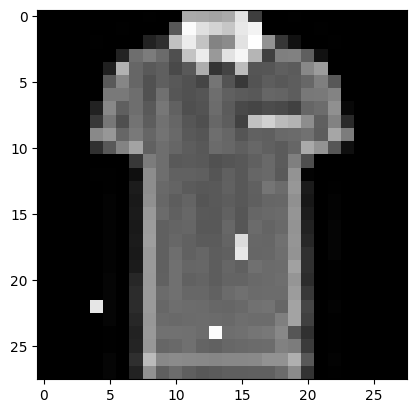

In [ ]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1)  # Reshape for compatibility with models


# Results CSV path
csv_path = "resultsFashionMNIST.csv"

# Create an instance of the Attack class
attack_instance = Attack(
    x_test=x_test,
    y_test=y_test,
    models=models,
    csv_path=csv_path,
    correct_imgs=correct_imgs,
    maxiter=75,
    popsize=400,
    verbose=True
)

final_results = attack_instance.attack_all(
    samples=10,
    pixels=(2, 4),
    targeted=False
)